# Data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.DataFrame(pd.read_csv('../../output/aidedd_blocks.csv'))
df.head()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
0,aarakocra,medium,humanoid (aarakocra),neutral good,"Auran, Aarakocra",12.0,13,0.25,20,0,...,0,0,0,0,passive Perception 15,Dive Attack. If the aarakocra is flying and di...,"Talon. Melee Weapon Attack: +4 to hit, reach 5...",none,0,Monster Manual (BR)
1,abjurer,medium,humanoid (any race),any alignment,any four languages,12.0,84,9,30,0,...,0,0,0,0,passive Perception 11,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
2,aboleth,large,aberration,lawful evil,"Deep Speech, telepathy 120 ft.",17.0,135,10,10,40,...,0,0,0,0,"darkvision 120 ft., passive Perception 20",Amphibious. The aboleth can breathe air and wa...,Multiattack. The aboleth makes three tentacle ...,"The aboleth can take 3 legendary actions, choo...",1,Monster Manual (SRD)
3,abominable-yeti,huge,monstrosity,chaotic evil,Yeti,15.0,137,9,40,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 15",unavailable,unavailable,unavailable,0,Monster Manual
4,acererak,medium,undead,neutral evil,"Abyssal, Common, Draconic, Dwarvish, Elvish, G...",21.0,285,23,30,0,...,15,0,0,0,"truesight 120 ft., passive Perception 22",unavailable,unavailable,unavailable,0,Adventures (Tomb of Annihilation)


In [3]:
# fill null
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(0)
df.head()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
0,aarakocra,medium,humanoid (aarakocra),neutral good,"Auran, Aarakocra",12.0,13,0.25,20,0,...,0,0,0,0,passive Perception 15,Dive Attack. If the aarakocra is flying and di...,"Talon. Melee Weapon Attack: +4 to hit, reach 5...",none,0,Monster Manual (BR)
1,abjurer,medium,humanoid (any race),any alignment,any four languages,12.0,84,9,30,0,...,0,0,0,0,passive Perception 11,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
2,aboleth,large,aberration,lawful evil,"Deep Speech, telepathy 120 ft.",17.0,135,10,10,40,...,0,0,0,0,"darkvision 120 ft., passive Perception 20",Amphibious. The aboleth can breathe air and wa...,Multiattack. The aboleth makes three tentacle ...,"The aboleth can take 3 legendary actions, choo...",1,Monster Manual (SRD)
3,abominable-yeti,huge,monstrosity,chaotic evil,Yeti,15.0,137,9,40,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 15",unavailable,unavailable,unavailable,0,Monster Manual
4,acererak,medium,undead,neutral evil,"Abyssal, Common, Draconic, Dwarvish, Elvish, G...",21.0,285,23,30,0,...,15,0,0,0,"truesight 120 ft., passive Perception 22",unavailable,unavailable,unavailable,0,Adventures (Tomb of Annihilation)


# Explore

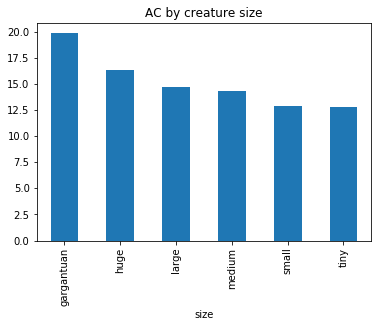

In [6]:
df.groupby('size')['ac'].mean().plot.bar(title='AC by creature size')

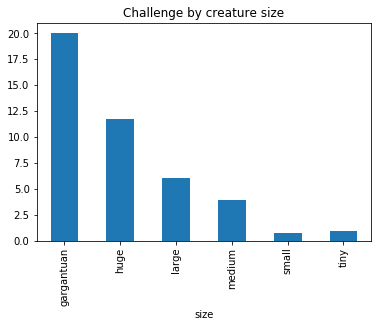

In [5]:
# convert 'cr' to float
df['cr'] = df['cr'].str.replace('1/8','.125')
df['cr'] = df['cr'].str.replace('1/4','.25')
df['cr'] = df['cr'].str.replace('1/2','.5')
df['cr'] = df['cr'].astype('float')

df.groupby('size')['cr'].mean().plot.bar(title='Challenge by creature size')

In [7]:
round(df.groupby('cr',0)[numeric_columns].mean(),2)

,ac,hp,speed,swim,fly,climb,burrow,passive_perception,darkvision,truesight,...,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,legendary
cr,,,,,,,,,,,,,,,,,,,,,
0.000,12.12,11.98,24.29,2.32,6.25,2.14,0.09,11.30,12.32,0.00,...,0.96,0.46,0.00,0.00,0.98,0.98,0.52,0.52,0.00,0.00
0.125,12.52,8.48,27.41,6.55,7.59,2.76,0.34,10.55,20.69,4.14,...,0.90,0.17,0.14,0.24,0.14,0.21,0.00,0.00,0.00,0.00
0.250,12.08,14.98,27.54,3.17,9.52,3.41,0.16,10.86,30.48,1.90,...,1.71,0.08,0.00,0.06,0.06,0.03,0.00,0.17,0.06,0.00
0.500,13.45,48.57,27.54,3.85,7.69,2.77,0.00,11.85,35.08,5.54,...,1.51,0.12,0.28,0.35,0.48,0.20,0.08,0.51,0.42,0.03
1.000,13.15,28.60,29.69,4.00,10.31,3.77,0.23,11.68,48.00,1.85,...,2.18,0.14,0.11,0.23,0.17,0.14,0.12,0.15,0.00,0.00
2.000,13.48,43.02,29.76,5.29,9.41,2.35,0.53,11.73,42.35,4.59,...,1.19,0.14,0.12,0.13,0.12,0.21,0.16,0.25,0.25,0.00
3.000,14.20,56.96,28.70,4.81,6.48,4.17,0.28,11.78,45.56,0.00,...,1.50,0.11,0.20,0.43,0.20,0.04,0.35,0.39,0.13,0.00
4.000,13.89,67.41,29.19,1.62,12.70,3.24,0.00,12.11,55.14,3.24,...,1.73,0.57,0.32,1.30,0.73,0.16,0.00,0.00,0.62,0.00
5.000,14.95,88.32,28.25,5.61,6.14,3.33,2.63,12.40,54.21,0.00,...,1.77,0.11,0.19,0.49,0.33,0.12,0.12,0.67,0.33,0.02


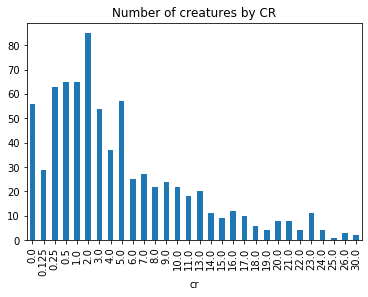

In [8]:
df.groupby('cr').size().plot.bar(title='Number of creatures by CR')

In [9]:
round(df.groupby('cr',0)[numeric_columns].median(),2)

,ac,hp,speed,swim,fly,climb,burrow,passive_perception,darkvision,truesight,...,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,legendary
cr,,,,,,,,,,,,,,,,,,,,,
0.000,12.0,6.0,30.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.125,12.0,9.0,30.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.250,12.0,13.0,30.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.500,13.0,22.0,30.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000,13.0,27.0,30.0,0.0,0.0,0.0,0.0,12.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.000,13.0,42.0,30.0,0.0,0.0,0.0,0.0,12.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.000,14.0,58.0,30.0,0.0,0.0,0.0,0.0,11.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.000,14.0,66.0,30.0,0.0,0.0,0.0,0.0,12.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000,15.0,85.0,30.0,0.0,0.0,0.0,0.0,12.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Basic ML

In [10]:
# feature selection
features_df = df.copy()
target = features_df.pop('cr')
selected_features = features_df

print(selected_features.shape, target.shape)

(762, 52) (762,)


In [11]:
# one hot encoder and scaler for pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))
)

ct.fit_transform(selected_features)

<762x1995 sparse matrix of type '<class 'numpy.float64'>'
	with 39624 stored elements in Compressed Sparse Row format>

In [12]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, 
                                                    target, 
                                                    random_state=42)

In [13]:
# build pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.pipeline import make_pipeline

model = LinearRegression()

pipe = make_pipeline(ct, model)

In [14]:
pipe.fit(X_train, y_train)

train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
preds = pipe.predict(X_test)

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9999999999992198
Test score: 0.9007980180475326
